In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
# new_path = '/capstor/scratch/cscs/ajayaraj/qtpyt-tests/AuBDA13CH2/production_run'
# os.chdir(new_path)

## Leads self-energy

In [ ]:
# leads_se = np.load("./output/lowdin/self_energy.npy", allow_pickle=True)
# energies = np.arange(-1, 1, 0.01)
# se = np.array([leads_se[0].retarded(e) for e in energies])

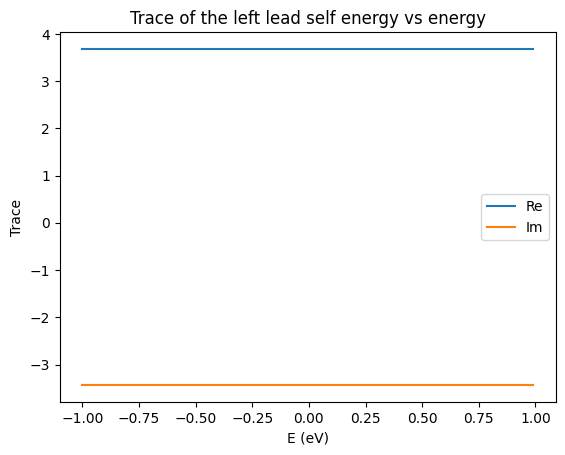

In [34]:
se_trace = np.trace(se[:,0:9,0:9], axis1=1, axis2=2)
plt.plot(energies,se_trace.real,label="Re")
plt.plot(energies,se_trace.imag,label="Im")
plt.legend()
plt.xlabel("E (eV)")
plt.ylabel("Trace")
plt.title("Trace of the left lead self energy vs energy")
plt.show()

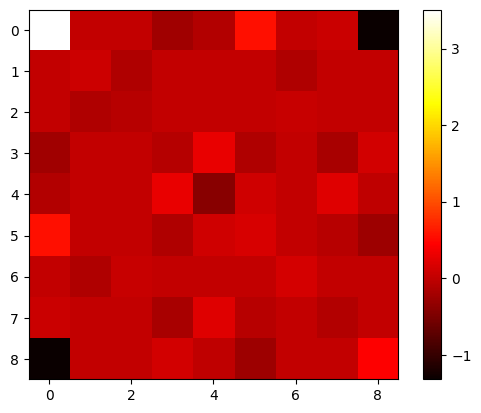

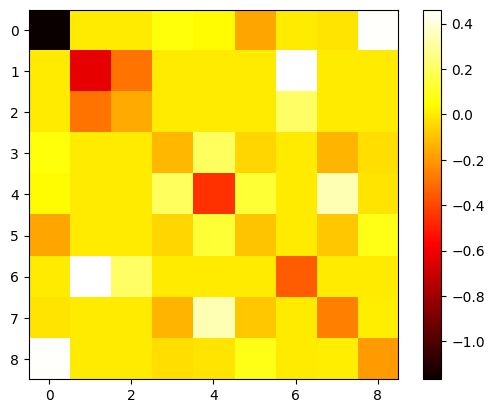

In [35]:
plt.imshow(se[10,0:9,0:9].real, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()
plt.imshow(se[10,0:9,0:9].imag, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


## DFT

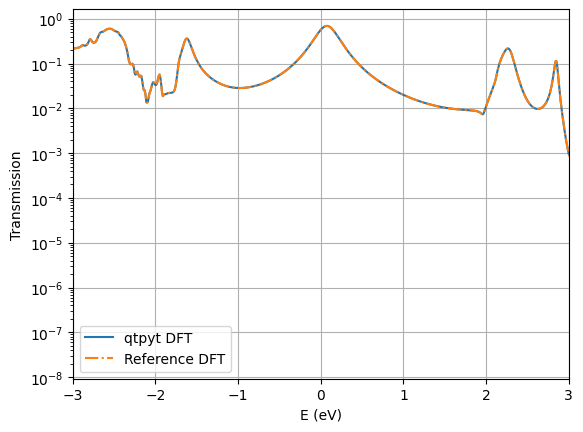

In [2]:
Angelo_dft = np.load("../Angelo_data/dft/Te_landauer.npy")
Angelo_dft = Angelo_dft[0]
E_dft,T_dft = np.load("./output/lowdin/dft/ET.npy")
E_ref, T_ref = np.load("../reference/ET_dft.npy")
plt.plot(E_dft, T_dft, label='qtpyt DFT')
plt.plot(E_ref, T_ref,'-.',label='Reference DFT')
# plt.plot(Angelo_dft[:,0],Angelo_dft[:,1],label="Angelo")
plt.yscale('log')
plt.legend()
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.xlim(-3,3)
plt.grid(True)
# plt.ylim(bottom=1e-6)

## DMFT

(7, 20000)
(20000,)


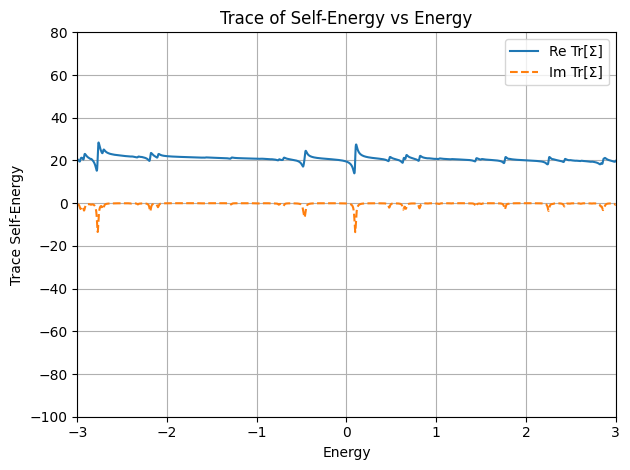

In [3]:
angelo_dmft_se = np.load("../Angelo_data/dmft/self.npy")
angelo_dmft_se = angelo_dmft_se[0]
angelo_energy = np.load("../Angelo_data/dmft/energies.npy")
print(angelo_dmft_se.shape)
print(angelo_energy.shape)

trace_self_energy = np.sum(angelo_dmft_se, axis=0)  # shape (20000,)

# Plot trace vs energy
plt.plot(angelo_energy, trace_self_energy.real, label='Re Tr[Σ]')
plt.plot(angelo_energy, trace_self_energy.imag, label='Im Tr[Σ]', linestyle='--')
plt.xlabel("Energy")
plt.ylabel("Trace Self-Energy")
plt.title("Trace of Self-Energy vs Energy")
plt.xlim(-3, 3.0)
plt.ylim(-100,80)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

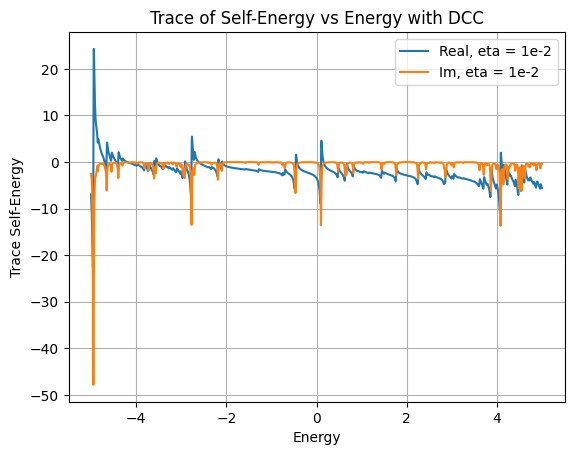

/home/jayn/miniconda3/envs/qtpyt/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [4]:
angelo_dmft_se = np.load("../Angelo_data/dmft/self.npy")
angelo_dmft_se = angelo_dmft_se[0]
V = np.loadtxt("output/lowdin/U_matrix.txt")
data_folder = "./output/lowdin"
occupancy_goal = np.load(f"{data_folder}/occupancies.npy")
double_counting = (V.diagonal() * (occupancy_goal - 0.5))
angelo_dmft_se = angelo_dmft_se - double_counting[:, np.newaxis]
trace_se = np.sum(angelo_dmft_se,axis=0)
plt.plot(angelo_energy,trace_se.real,label="Real, eta = 1e-2")
plt.plot(angelo_energy,trace_se.imag,label="Im, eta = 1e-2")
plt.xlabel("Energy")
plt.ylabel("Trace Self-Energy")
plt.title("Trace of Self-Energy vs Energy with DCC")
# plt.xlim(-1,1)
# plt.ylim(-10, 10)
plt.grid(True)
plt.legend()
plt.show()

mask = (angelo_energy >= -3) & (angelo_energy <= 3)
filtered_energies = angelo_energy[mask]
filtered_self_energy = angelo_dmft_se[:, mask]
subsampled_self_energy_T = filtered_self_energy.T
self_energy_matrices = np.array([np.diag(vec) for vec in subsampled_self_energy_T])

np.save("./output/lowdin/dmft/non_spin/energies.npy", filtered_energies)
np.save("./output/lowdin/dmft/non_spin/self_energy.npy", self_energy_matrices)
np.save("./output/lowdin/dmft/non_spin/trace_self_energy.npy", (filtered_energies,trace_se))

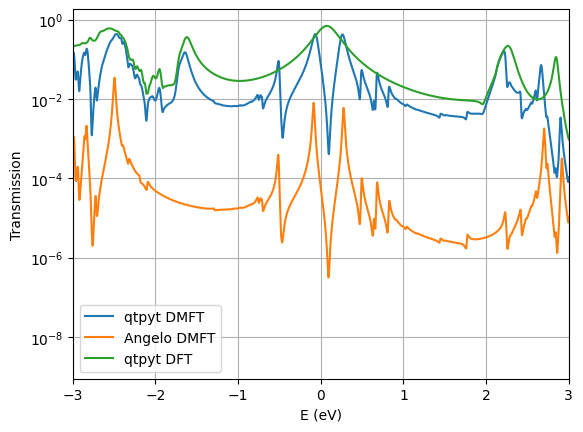

In [5]:
E, T_dmft = np.load("./output/lowdin/dmft/non_spin/ET.npy")
Angelo_dmft = np.load("../Angelo_data/dmft/Te_landauer.npy")
Angelo_dmft = Angelo_dmft[0]
plt.plot(E, T_dmft, label='qtpyt DMFT')
plt.plot(Angelo_dmft[:,0], Angelo_dmft[:,1], label="Angelo DMFT")
plt.plot(E_dft, T_dft, label='qtpyt DFT')
plt.yscale('log')
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.xlim(-3, 3)
plt.grid(True)
# plt.ylim(bottom=1e-6)
plt.legend()
plt.show()

## Spin DMFT

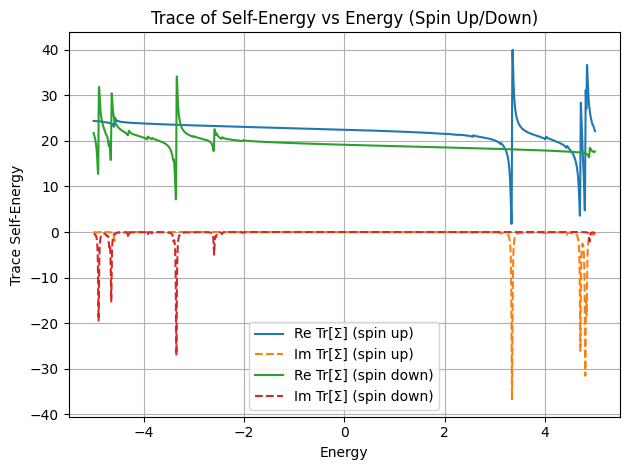

In [6]:
angelo_dmft_se = np.load("../Angelo_data/dmft-spin/self.npy")
spin_up_trace = np.sum(angelo_dmft_se[0], axis=0)
spin_down_trace = np.sum(angelo_dmft_se[1], axis=0)

plt.plot(angelo_energy, spin_up_trace.real, label='Re Tr[Σ] (spin up)')
plt.plot(angelo_energy, spin_up_trace.imag, '--', label='Im Tr[Σ] (spin up)')
plt.plot(angelo_energy, spin_down_trace.real, label='Re Tr[Σ] (spin down)')
plt.plot(angelo_energy, spin_down_trace.imag, '--', label='Im Tr[Σ] (spin down)')
plt.xlabel("Energy")
plt.ylabel("Trace Self-Energy")
plt.title("Trace of Self-Energy vs Energy (Spin Up/Down)")
# plt.xlim(-3, 3)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


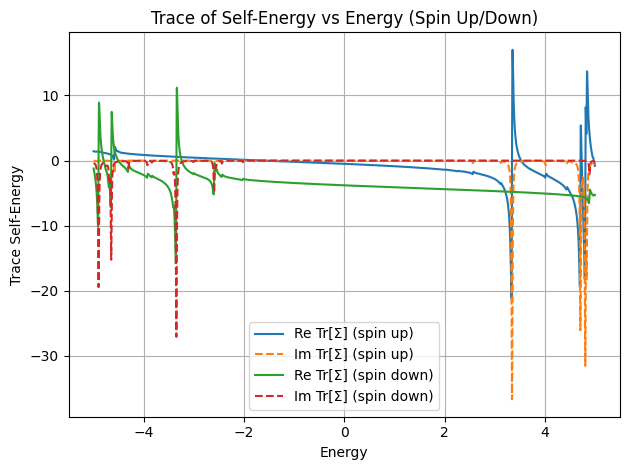

In [7]:
occupancy_goal_up = occupancy_goal
occupancy_goal_down = occupancy_goal
double_counting_up = (V.diagonal() * (occupancy_goal_up - 0.5))
double_counting_down = (V.diagonal() * (occupancy_goal_down - 0.5))
angelo_dmft_se = np.load("../Angelo_data/dmft-spin/self.npy")

angelo_dmft_se_up = angelo_dmft_se[0]
angelo_dmft_se_down = angelo_dmft_se[1]

angelo_dmft_se_up = angelo_dmft_se_up - double_counting_up[:, np.newaxis]
angelo_dmft_se_down = angelo_dmft_se_down - double_counting_down[:, np.newaxis]
spin_up_trace = np.sum(angelo_dmft_se_up, axis=0)
spin_down_trace = np.sum(angelo_dmft_se_down, axis=0)

plt.plot(angelo_energy, spin_up_trace.real, label='Re Tr[Σ] (spin up)')
plt.plot(angelo_energy, spin_up_trace.imag, '--', label='Im Tr[Σ] (spin up)')
plt.plot(angelo_energy, spin_down_trace.real, label='Re Tr[Σ] (spin down)')
plt.plot(angelo_energy, spin_down_trace.imag, '--', label='Im Tr[Σ] (spin down)')
plt.xlabel("Energy")
plt.ylabel("Trace Self-Energy")
plt.title("Trace of Self-Energy vs Energy (Spin Up/Down)")
# plt.xlim(-3, 3)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

mask = (angelo_energy >= -3) & (angelo_energy <= 3)
filtered_self_energy_up = angelo_dmft_se_up[:, mask]
filtered_self_energy_down = angelo_dmft_se_down[:, mask]
subsampled_self_energy_T_up = filtered_self_energy_up.T
subsampled_self_energy_T_down = filtered_self_energy_down.T
self_energy_matrices_up = np.array([np.diag(vec) for vec in subsampled_self_energy_T_up])
self_energy_matrices_down = np.array([np.diag(vec) for vec in subsampled_self_energy_T_down])

np.save("./output/lowdin/dmft/spin/self_energy_up.npy", self_energy_matrices_up)
np.save("./output/lowdin/dmft/spin/self_energy_dw.npy", self_energy_matrices_down)
np.save("./output/lowdin/dmft/spin/trace_self_energy_up.npy", (filtered_energies,spin_up_trace))
np.save("./output/lowdin/dmft/spin/trace_self_energy_dw.npy", (filtered_energies,spin_down_trace))


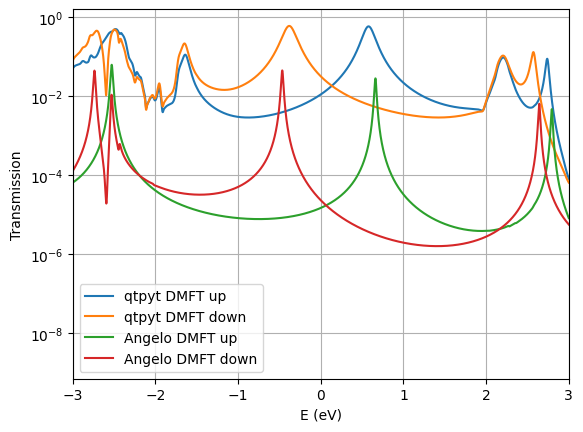

In [8]:
E, T_up = np.load("./output/lowdin/dmft/spin/ET_up.npy")
_, T_down = np.load("./output/lowdin/dmft/spin/ET_dw.npy")
Angelo_dmft = np.load("../Angelo_data/dmft-spin/Te_landauer.npy")
plt.plot(E, T_up, label='qtpyt DMFT up')
plt.plot(E, T_down, label='qtpyt DMFT down')
plt.plot(Angelo_dmft[0,:,0], Angelo_dmft[0,:,1], label="Angelo DMFT up")
plt.plot(Angelo_dmft[1,:,0], Angelo_dmft[1,:,1], label="Angelo DMFT down")
plt.yscale('log')
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.xlim(-3, 3)
plt.grid(True)
# plt.ylim(bottom=1e-6)
plt.legend()
plt.show()

## Exact diagonalization

In [9]:
E, T_ed = np.load("./output/lowdin/ed/ET.npy")
E_ref, T_ref = np.load("../reference/ET_ed.npy")
plt.plot(E, T_ed, label='qtpyt ED')
plt.plot(E_ref, T_ref, label='Reference ED')
# plt.plot(E_dft, T_dft, label='qtpyt DFT')
plt.yscale('log')
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.xlim(-3, 3)
plt.grid(True)
plt.ylim(bottom=1e-5)
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './output/lowdin/ed/ET.npy'